# Preface

**Topic**: Lobster Land Winter Carnival Proposal

**Group**:Caribou

**Group member**: Ranfei Xu, Yanbing Chen, Nuo Chen, Yuli Jin, Qiannan Shen, Zening Ye

# Summary Stats
    
## Data Processing

In [115]:
%cd E:\22FALL\AD654\Final\data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('angels_market.csv')
# df.head()

E:\22FALL\AD654\Final\data


In [2]:
# description of variables
# df.describe()

In [3]:
# Information of dataset
# df.info()

In [4]:
# count NA values
# df.isna().sum()

In [5]:
# get unique variable in homeState
df['homeState'].unique()

array(['Maine', 'Vermont', 'New Hampshire', 'Quebec', 'Connecticut',
       'Massachusetts', 'Ontario', '6', '5', '2', '7', '4'], dtype=object)

In [6]:
# get unique variable in theme
df['theme'].unique()

array(['Hot Chocolate/Warm Treats', 'Local Artists', 'Fortune Teller',
       'Fried Dough and Pizza', 'craft beer', 'Homemade Holiday Gifts',
       'Video Game/eSports', 'Games Of Chance', 'Steaming Hot Cocktails',
       'Canadian Snacks', 'Maine Tourism Promotion', 'DIY Ice Sculpture',
       'Local Politician', 'Specialty Ice Cream', '8', '3', '4', '7', '5',
       '9'], dtype=object)

In [7]:
# data processing
df_new = df.copy()
state = ['Maine', 'Vermont', 'New Hampshire', 'Quebec', 'Connecticut',
       'Massachusetts', 'Ontario']
df_new['homeState'] = np.where(df_new['homeState'].isin(state), 
                           df['homeState'], np.NaN)
df_new['theme'] = np.where(df_new['theme'].isin(['8', '3', '4', '7', '5','9']),
                      np.NaN, df['theme'])

In [8]:
df_new.isna().sum()

vendorID            0
theme               8
homeState           8
carnivals           0
complaints          0
est_energy          0
est_hourly_vol      0
LL_passholder       0
est_hourly_gross    0
dtype: int64

In [9]:
# drop NA variable
df_new_c = df_new.dropna()
df_new_c = df_new_c.drop('vendorID', axis=1)

In [10]:
# mean value of estimate value
df_new_c.groupby('homeState')['est_energy','est_hourly_vol','est_hourly_gross'].mean()

C:\Users\ranfe\AppData\Local\Temp/ipykernel_1128/689612109.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new_c.groupby('homeState')['est_energy','est_hourly_vol','est_hourly_gross'].mean()


,est_energy,est_hourly_vol,est_hourly_gross
homeState,,,
Connecticut,49.491742,113.125000,222.371250
Maine,47.495915,110.956835,219.283405
Massachusetts,44.172066,115.481481,224.830000
New Hampshire,47.629391,112.228571,218.738857
Ontario,48.428355,115.187500,223.366875
Quebec,48.727077,110.351852,212.406296
Vermont,51.418017,109.783333,216.440167


In [11]:
# correlation of each variables
df_new_c.corr()

,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
carnivals,1.000000,-0.013400,0.012801,0.012601,-0.012359,-0.017352
complaints,-0.013400,1.000000,-0.037507,0.042317,-0.002088,-0.058495
est_energy,0.012801,-0.037507,1.000000,-0.011543,-0.021859,0.003329
est_hourly_vol,0.012601,0.042317,-0.011543,1.000000,0.023960,0.342181
LL_passholder,-0.012359,-0.002088,-0.021859,0.023960,1.000000,0.042162
est_hourly_gross,-0.017352,-0.058495,0.003329,0.342181,0.042162,1.000000


## Data Visualizations

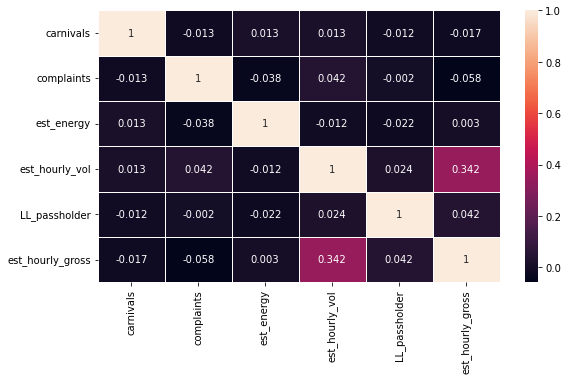

In [125]:
# correlation plot
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.heatmap(df_new_c.corr().round(3), 
            annot=True, fmt='g', linewidth=0.5, ax=ax)

plt.show()

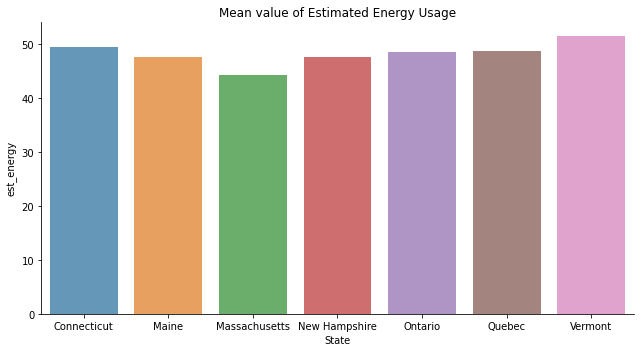

In [124]:
# Estimate Energe usage
est_eng_mean = df_new_c.groupby('homeState')['est_energy'].mean()
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.barplot(x=est_eng_mean.index, y=est_eng_mean, alpha=0.75,ax=ax)
plt.title('Mean value of Estimated Energy Usage')
ax.set_xlabel('State')
ax.spines[['top','right']].set_visible(False)
plt.tight_layout()
plt.show()

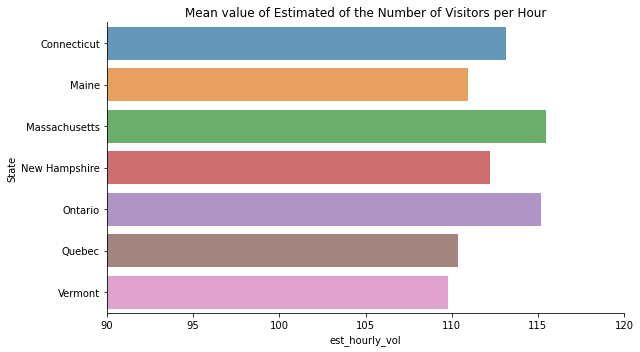

In [126]:
# Estimate hourly volumn
est_hr_mean = df_new_c.groupby('homeState')['est_hourly_vol'].mean()
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.barplot(y=est_hr_mean.index, x=est_hr_mean, alpha=0.75,ax=ax)
plt.title('Mean value of Estimated of the Number of Visitors per Hour')
ax.set_ylabel('State')
ax.spines[['top','right']].set_visible(False)
ax.set_xlim([90, 120])
plt.tight_layout()
plt.show()

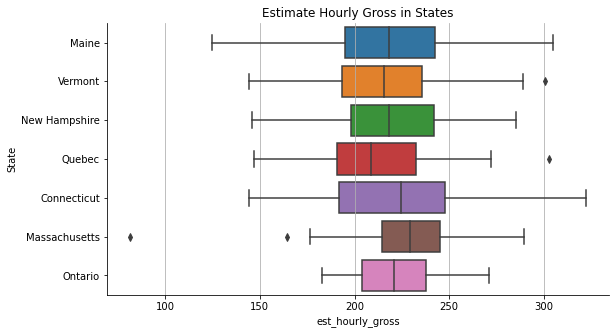

In [128]:
# Estimate hourly gross
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.boxplot(data=df_new_c, x='est_hourly_gross', y='homeState', ax=ax)
ax.grid(axis='x')
ax.set_title('Estimate Hourly Gross in States')
ax.set_ylabel('State')
ax.spines[['top','right']].set_visible(False)
plt.show()

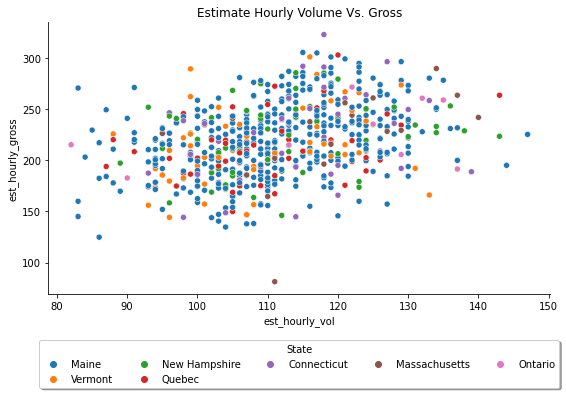

In [133]:
# estimate horly volume vs. estimated horly gross
fig, ax = plt.subplots(1, 1,figsize=(9,5))
sns.scatterplot(x=df_new_c.est_hourly_vol, y=df_new_c.est_hourly_gross, 
                hue=df_new_c.homeState, ax=ax)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
ax.set_title('Estimate Hourly Volume Vs. Gross')
ax.get_legend().set_title('State')
ax.spines[['top','right']].set_visible(False)
plt.show()

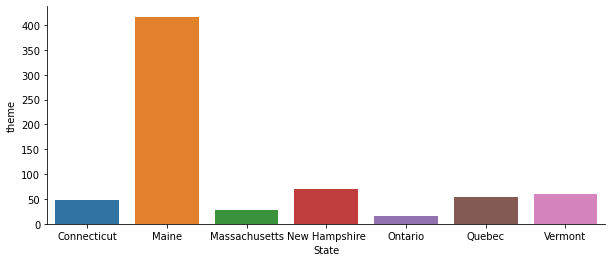

In [132]:
# theme count for each states
theme = df_new_c.groupby('homeState')['theme'].count()
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(x=theme.index, y=theme, ax=ax)
ax.set_xlabel('State')
ax.spines[['top','right']].set_visible(False)
plt.show()

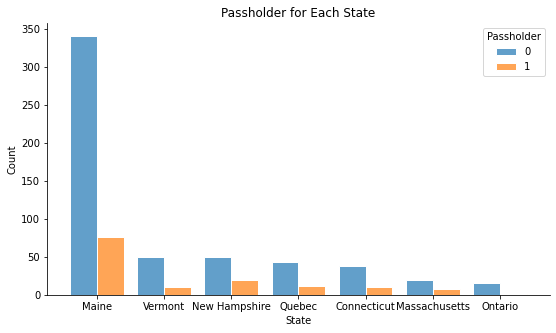

In [131]:
# passholder for each state
passholder = df_new_c[['homeState', 'LL_passholder']]
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.histplot(passholder,x='homeState', hue='LL_passholder', 
             multiple="dodge", shrink=.8, alpha=0.7, edgecolor='white', ax=ax)
ax.set_title('Passholder for Each State')
ax.get_legend().set_title('Passholder')
ax.set_xlabel('State')
ax.spines[['top','right']].set_visible(False)
plt.show()

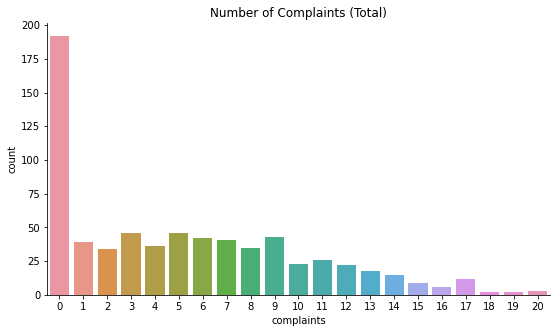

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.countplot(x=df_new_c.complaints, ax=ax)
ax.set_title('Number of Complaints (Total)')
ax.spines[['top','right']].set_visible(False)
plt.show()

## Summary of Angel’s Market Data

According to the correlation of each variable in the dataset, there is no significant correlation between the variables except for `est_hourly_vol` and `est_horly_gross`, in other words the variables are relatively independent. In addition, we plot the mean value for three different estimate variables. The mean value of estimate energy usage for every state is not varied a lot, Massachusetts has the lowest estimate energy usage of all states. However, there is a big different in the mean value of estimate of hourly gross. We also try to examine the relationship between the `est_hourly_vol` and `est_hourly_gross`, and it turns out that there is no relationship between these variables. 

The state of Maine has the most themes compared to other states. The good thing is there are not too many complaints about carnival activities, most of the majority of vendors can still accept these activities. Overall, the entire dataset has much more vendor about Maine than other regions. Because of the geographic location, there are more opportunities for local people to attend this event. This is why most of the variables are related to Maine. 

Based on the number of complaints and carnival events, we would suggest the management continues to hold similar events and can bring in vendors from different states for development. In addition, encourage vendor to apply their pass. The management can offer some discount for the vendor if they have a valid pass.

The limitation of this dataset is we did not have an estimate of sales per hour based on estimate number of visitors. We might use this variable to find the correlation between theme and hourly gross, and determine which theme generates the most sales for the Angel’s market. 


# Segmentation and Targeting

In [20]:
family = pd.read_csv('maine_families.csv')
family.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,LL_passholder
0,1,1.0,own,3309,82050.03,1,Aroostook,3189.11,2028.559211,Yes
1,2,1.0,own,3814,83077.81,2,Midcoast,4175.35,4713.280000,Yes
2,3,2.0,rent,2592,91401.41,2,Downeast_Acadia,1814.98,3479.070000,No
3,4,1.0,own,2628,73048.55,1,Greater Portland,1945.14,3842.420000,No
4,5,1.0,rent,2442,89145.36,2,Kennebec Valley,4410.86,1913.280000,Yes


In [21]:
family.isnull().sum()

householdID                 0
total_ppl                  75
own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
LL_passholder               0
dtype: int64

In [22]:
family = family.dropna()

## K-means Clustering

In [23]:
from sklearn.preprocessing import StandardScaler

df = family.drop(columns = ["householdID", "own_rent", "region", "LL_passholder"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) 
scaled_family = pd.DataFrame(scaled_data, columns=df.columns)
scaled_family.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,-0.712254,0.231940,-0.099660,-0.643910,-0.211759,-1.816865
1,-0.712254,0.850669,-0.059785,0.621277,0.590405,1.135971
2,0.514566,-0.646533,0.263151,0.621277,-1.329415,-0.221496
3,-0.712254,-0.602426,-0.448896,-0.643910,-1.223549,0.178140
4,-0.712254,-0.830314,0.175622,0.621277,0.781958,-1.943657


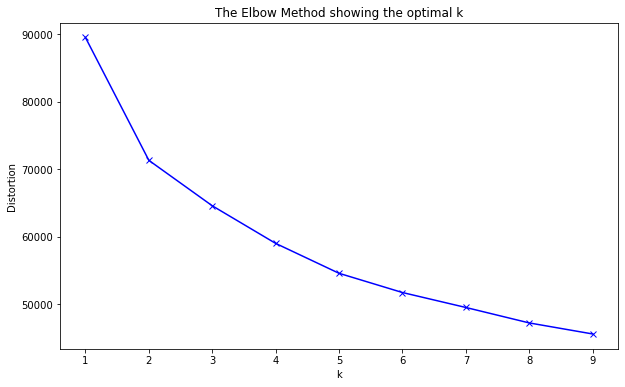

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_family)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We think k=4 could be used in the model. As shown in the elbow plot, a sharp bend occurs when k = 5. As k increases after k = 5, the distance has not dropped as much as before.

In [25]:
kmeans = KMeans(n_clusters=5, random_state = 100)
kmeans.fit(scaled_family)

KMeans(n_clusters=5, random_state=100)

In [26]:
cluster_labels = kmeans.labels_
cluster_family = scaled_family.assign(Cluster = cluster_labels)
cluster_family.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,Cluster
0,-0.712254,0.231940,-0.099660,-0.643910,-0.211759,-1.816865,1
1,-0.712254,0.850669,-0.059785,0.621277,0.590405,1.135971,3
2,0.514566,-0.646533,0.263151,0.621277,-1.329415,-0.221496,4
3,-0.712254,-0.602426,-0.448896,-0.643910,-1.223549,0.178140,1
4,-0.712254,-0.830314,0.175622,0.621277,0.781958,-1.943657,4


In [27]:
family_new = pd.get_dummies(family, drop_first=True, 
                            columns=["own_rent", "LL_passholder"])
family_new = pd.get_dummies(family_new, drop_first=False, 
                            columns=["region"])
family_new.head()

,householdID,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,own_rent_rent,LL_passholder_Yes,region_Aroostook,region_Downeast_Acadia,region_Greater Portland,region_Kennebec Valley,region_Midcoast
0,1,1.0,3309,82050.03,1,3189.11,2028.559211,0,1,1,0,0,0,0
1,2,1.0,3814,83077.81,2,4175.35,4713.280000,0,1,0,0,0,0,1
2,3,2.0,2592,91401.41,2,1814.98,3479.070000,1,0,0,1,0,0,0
3,4,1.0,2628,73048.55,1,1945.14,3842.420000,0,0,0,0,1,0,0
4,5,1.0,2442,89145.36,2,4410.86,1913.280000,1,1,0,0,0,1,0


In [28]:
family_new.columns

Index(['householdID', 'total_ppl', 'square_foot', 'household_income',
       'number_pets', 'entertainment_spend_est', 'travel_spend_est',
       'own_rent_rent', 'LL_passholder_Yes', 'region_Aroostook',
       'region_Downeast_Acadia', 'region_Greater Portland',
       'region_Kennebec Valley', 'region_Midcoast'],
      dtype='object')

In [29]:
#include the categorical variables
add = family_new[['own_rent_rent', 'LL_passholder_Yes', 'region_Aroostook',
       'region_Downeast_Acadia', 'region_Greater Portland',
       'region_Kennebec Valley', 'region_Midcoast']]
result = pd.concat([cluster_family, add], axis=1, join="inner")
result.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,Cluster,own_rent_rent,LL_passholder_Yes,region_Aroostook,region_Downeast_Acadia,region_Greater Portland,region_Kennebec Valley,region_Midcoast
0,-0.712254,0.231940,-0.099660,-0.643910,-0.211759,-1.816865,1,0,1,1,0,0,0,0
1,-0.712254,0.850669,-0.059785,0.621277,0.590405,1.135971,3,0,1,0,0,0,0,1
2,0.514566,-0.646533,0.263151,0.621277,-1.329415,-0.221496,4,1,0,0,1,0,0,0
3,-0.712254,-0.602426,-0.448896,-0.643910,-1.223549,0.178140,1,0,0,0,0,1,0,0
4,-0.712254,-0.830314,0.175622,0.621277,0.781958,-1.943657,4,1,1,0,0,0,1,0


In [30]:
result.columns

Index(['total_ppl', 'square_foot', 'household_income', 'number_pets',
       'entertainment_spend_est', 'travel_spend_est', 'Cluster',
       'own_rent_rent', 'LL_passholder_Yes', 'region_Aroostook',
       'region_Downeast_Acadia', 'region_Greater Portland',
       'region_Kennebec Valley', 'region_Midcoast'],
      dtype='object')

In [31]:
#summary statistics about each of your clusters.
result.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean', 
    'household_income': 'mean', 
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean', 
    'travel_spend_est': 'mean', 
    'Cluster': 'mean',
    'own_rent_rent': 'mean',
    'LL_passholder_Yes': 'mean', 
    'region_Aroostook': 'mean',
    'region_Downeast_Acadia': 'mean', 
    'region_Greater Portland': 'mean',
    'region_Kennebec Valley': 'mean', 
    'region_Midcoast': 'mean'
}).round(2)

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est,Cluster,own_rent_rent,LL_passholder_Yes,region_Aroostook,region_Downeast_Acadia,region_Greater Portland,region_Kennebec Valley,region_Midcoast
Cluster,,,,,,,,,,,,,,
0,0.25,1.18,-0.48,0.00,-0.55,0.15,0.0,0.24,0.22,0.22,0.20,0.20,0.20,0.19
1,0.23,-0.57,-0.54,-0.94,-0.44,-0.70,1.0,0.25,0.21,0.20,0.20,0.21,0.19,0.20
2,0.54,0.16,1.04,-0.02,1.16,0.78,2.0,0.26,0.21,0.20,0.19,0.21,0.19,0.21
3,-1.16,-0.13,0.52,-0.03,0.32,0.54,3.0,0.23,0.21,0.20,0.20,0.20,0.20,0.20
4,0.27,-0.53,-0.50,0.95,-0.43,-0.70,4.0,0.25,0.21,0.18,0.23,0.19,0.19,0.20


## Cluster Visualizations

Text(0.5, 1.0, 'Heatmap for the Clusters of Maine Family')

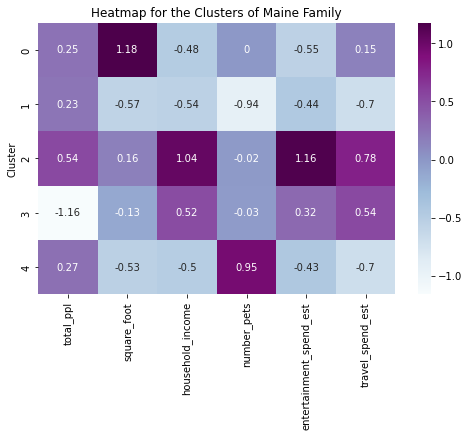

In [135]:
import seaborn as sns

summary = result.groupby(['Cluster']).agg({
    'total_ppl': 'mean',
    'square_foot': 'mean', 
    'household_income': 'mean', 
    'number_pets': 'mean',
    'entertainment_spend_est': 'mean', 
    'travel_spend_est': 'mean'
}).round(2)

plt.figure(figsize = (8,5))
sns.heatmap(summary, annot = True, cmap='BuPu', fmt='g').set_title('Heatmap for the Clusters of Maine Family')

The heatmap shows that the families in cluster 2 have the highest number of individuals living in the home, the highest total annual income for the household, and the highest household's annual spending on travel and entertainment. The families in cluster 4 have the highest total number of pets owned by members of the household. And the families in cluster 0 have the highest number of square feet in the residence. While the families in cluster 1 have the lowest total number of pets owned by members of the household. The families in cluster 3 have the lowest number of individuals living in the home.

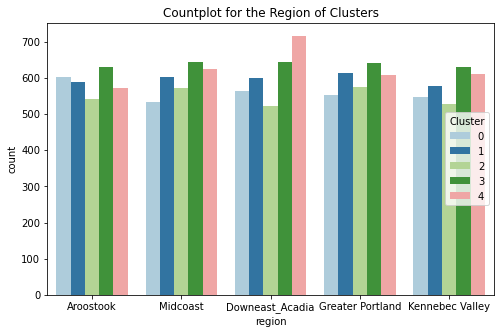

In [136]:
family['Cluster'] = result['Cluster'].astype('category')
plt.figure(figsize=(8,5))
sns.countplot(x='region', hue='Cluster', data = family, palette='Paired').set_title('Countplot for the Region of Clusters')
plt.legend(loc='center right', title = 'Cluster')

The count plot shows the distribution of families' regions in five clusters. The families in the different clusters are almost distributed evenly in five regions. However, one thing worth noting is that the number of families in cluster 4 is higher in the Downeast Acadia region.

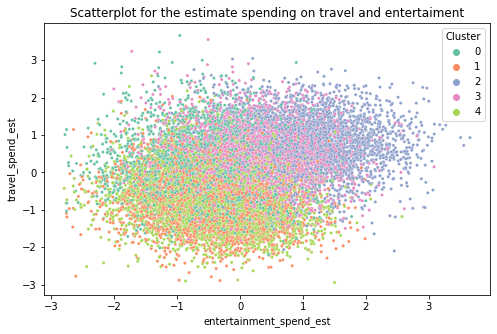

In [137]:
result['Cluster'] = result['Cluster'].astype('category')
plt.figure(figsize=(8,5))
sns.despine()
p1 = sns.scatterplot(x = 'entertainment_spend_est', y = 'travel_spend_est', s=10, hue='Cluster', 
                     palette='Set2', data = result).set_title('Scatterplot for the estimate spending on travel and entertaiment')

The scatterplot shows the distribution for the estimate spending on travel and entertaiment. It shows that the families in the cluster 2 would spend most money on the entertaiment. And families in the cluster 3 would also spend lots of money on the entertaiment.  Compared with the families in the cluster 2 and 3, the budget on the entertainment for the families in cluster 0 and 4 is lower. All the families in cluster 0, 2 and 3 would spend much money on travel. While the families in the cluster 4 would not spend much money on travel.

For more details about the spending on travel and entertaiment, please see the two figures below.

Text(0.5, 1.0, 'The boxplot for the spending on entertainment')

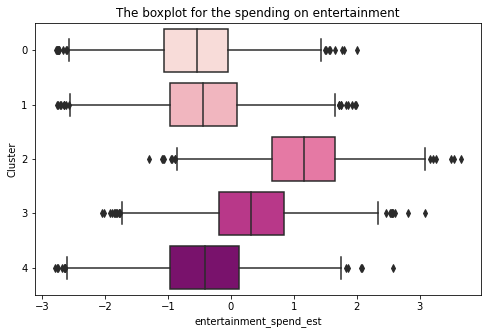

In [138]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'Cluster', x='entertainment_spend_est', data = result, palette='RdPu').set_title('The boxplot for the spending on entertainment')

Text(0.5, 1.0, 'The boxplot for the spending on travel')

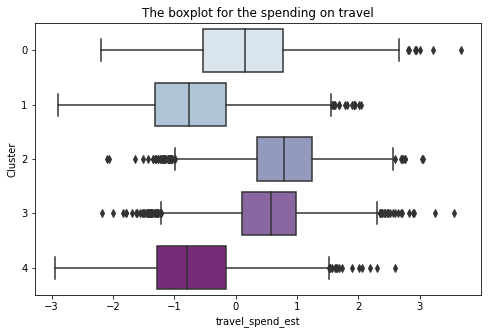

In [139]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'Cluster', x='travel_spend_est', data = result, palette='BuPu').set_title('The boxplot for the spending on travel')

Text(0.5, 1.0, 'The boxplot for Household Income')

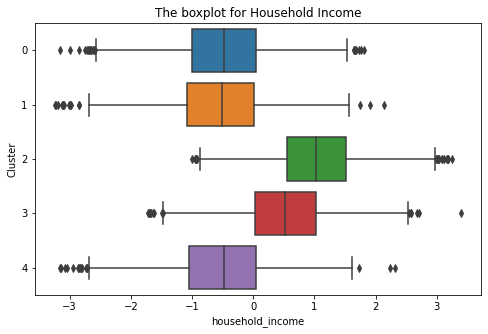

In [140]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'Cluster', x='household_income', data = result).set_title('The boxplot for Household Income')

This barplot shows that the families in the Cluster 2 have the highest income, while the household's annual income for families in Cluster 0, 1, and 4 is low.

Text(0.5, 1.0, 'The boxplot for the square feet in the residence')

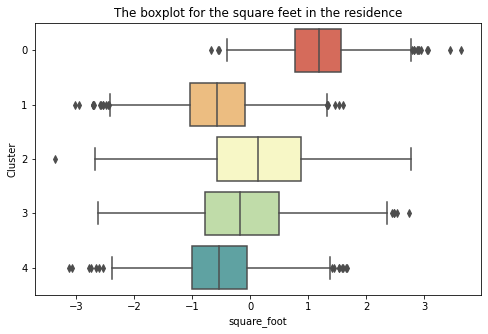

In [141]:
plt.figure(figsize = (8,5))
sns.boxplot(y = 'Cluster', x='square_foot', data = result, palette='Spectral').set_title('The boxplot for the square feet in the residence')

The box plot shows that the families in cluster have the largest residence which is much bigger than other clusters. While the families in cluster 1 and 4 have the smallest residence.

Text(0.5, 1.0, 'The barplot for the number of individuals living in the home')

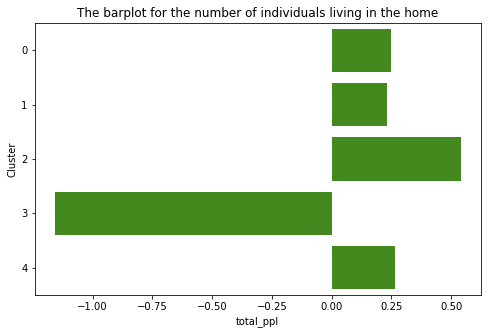

In [142]:
plt.figure(figsize =  (8,5))
sns.barplot(y = 'Cluster', x = 'total_ppl', ci = None, color='xkcd:grass green', data = result).set_title('The barplot for the number of individuals living in the home')

The bar plot indicates that the families in Cluster 3 has the lowest families members living together and it is much lower than other four clusters. While the families in cluster 2 is largest.

Text(0.5, 1.0, 'The barplot for the total number of pets owned by members of the household')

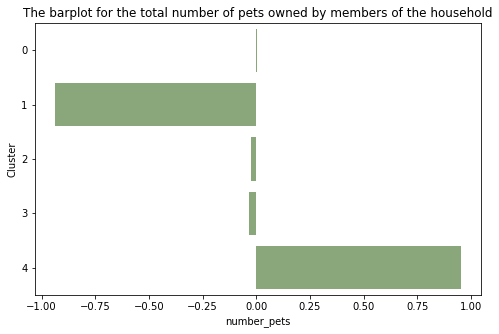

In [143]:
plt.figure(figsize =  (8,5))
sns.barplot(y = 'Cluster', x = 'number_pets', ci = None, color='xkcd:sage', data = result).set_title('The barplot for the total number of pets owned by members of the household')

This plot indicates that there is no much difference in cluster 0, 2 and 3 on owning pets. However, families in cluster 4 owns many pets which shows their love to pets. While the families in cluster 1 don't pet a lot, comparing with other clusters.

## Targeting

We name the cluster 0 as 'Family with biggest residence and lowest budget on entertainment' since the group spend the lowest money on the entertainment and have the biggest square feet of their residence. Though this cluster spend lowest money on the entertainment, the families are still willing to have a reasonable budget on travel. And they live in a bigest apartment or house but it doesn't mean much, since the household's annual income is not high. Our group would send the marketing emails to the families in this cluster with more details and images more on travel part and less on the entertainment part. Since they don't have a high budget and their income is not high, we recommend the park could send them some deals and conpons.

We name the cluster 1 as 'Family with Lowest total budget on travel and entertainment' since their budget on the entertainment and travel is lowest among the five clusters and other variables don't show their protential interest in the Lobster Land. The variables are low in also lowest on number of square feet in the residence, total annual income for the household and total number of pets owned by members of the household. We recommend the park send some good deals and conpons that really attract them and could let them save lots of money.

We name the cluster 2 as 'Large Family with highest income and highest budget' since the their budget on the entertainment and travel is highest among the five clusters and they are richest with highest household income and largest number of individuals living in the home. Since they would spend most money on the entertainment and travel and they earn lots of money, the families are the top potential visitors for Lobster Land and they would like to come with a big family. We recommend the park send more marketing emails and advertisement to these families. And let them know Lobster Land have lots of fun on entertainment and it is a ideal place to travel for whole family. We also recommend park target this cluster with some expensive activities. 

We name the cluster 3 as 'Small Family with good income and budget', since this cluster also have a high budget on the entertainment and travel and the income of the household is high. The only thing should be noticed is that the number of individuals living in the home is lowest. Since the families in this cluster have a good budget and income, we would recommend the park send more marketing emails and advertisement to these families and emphasize that the Lobster Land is also good for a small group of family.

We name the cluster 4 as 'Pets lover', since the total number of pets owned by members of the household  in this group is highest. Though the spending on entertainment and travel and the annual household's income is really low in this group, the members in this cluster really like pets. We recommend the park hold some games for people and dog which could increase human-dog interaction. And when the park send the marketing email, they should emphasize Lobster Land is super pet-friendly and have lots of games for them. As for their low budget, park should send them more good deals and conpons.

## Conclusion for Cluster and Targeting

Our team finally create 5 clusters for maine families and named 'Family with biggest residence and lowest budget on entertainment', 'Family with Lowest total budget on travel and entertainment', 'Large Family with highest income and highest budget', 'Small Family with good income and budget' and 'Pets lover'. For 'Family with biggest residence and lowest budget on entertainment', we recommend park send the marketing emails with more details and images more on travel part and less on the entertainment part, and also some deals and conpons. For 'Family with Lowest total budget on travel and entertainment', we recommend the park send some good deals and conpons that really attract them and could let them save lots of money. For 'Large Family with highest income and highest budget', these group is the main target for park management and we recommend the park send more marketing emails and advertisement to big families. For 'Small Family with good income and budget', we would recommend the park send more marketing emails and advertisement to these families and emphasize that the Lobster Land is also good for a small group of family. For 'Pets lover', we recommend the park hold some games for people and dog which could increase human-dog interaction.

# Conjoint Analysis & Memo Section

In [39]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
lake_df = pd.read_csv('bbq_lake.csv',index_col=0)
vendor_df = pd.read_csv('vendor_costs.csv')

In [41]:
lake_df.columns[:-1]

Index(['starter', 'maindishI', 'maindishII', 'side', 'dessert'], dtype='object')

## Conjoint Analysis

In [42]:
lake_df_dummy = pd.get_dummies(lake_df, drop_first=True, columns=lake_df.columns[:-1])
X=lake_df_dummy.drop(columns=['avg_rating'])
y=lake_df_dummy['avg_rating']

In [43]:
regressor = LinearRegression()
regressor.fit(X, y)
lake_df['pred'] = regressor.predict(X)

In [44]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df.loc['starter_Crabcakes and Shrimp']= 0
coef_df.loc['maindishI_BBQ Brisket']= 0
coef_df.loc['maindishII_Beef Short Rib']= 0
coef_df.loc['dessert_Apple Pie a la Mode']=0
coef_df.loc['side_French Fry Platter']=0

In [45]:
temp_info = coef_df.index.str.split('_')
coef_df = coef_df.assign(food_type = [i[0] for i in temp_info],
                           Item = [i[1] for i in temp_info])

#(lambda x:x.split('_'))

In [46]:
coef_plot_df= coef_df.groupby('food_type').apply(lambda x: x.sort_values(by=['Coefficient'],ascending=[True])).reset_index(level=0,drop=True)
coef_plot_df

,Coefficient,food_type,Item
dessert_Peach Cobbler,-0.739167,dessert,Peach Cobbler
dessert_Apple Pie a la Mode,0.000000,dessert,Apple Pie a la Mode
maindishI_BBQ Chicken,-0.207917,maindishI,BBQ Chicken
maindishI_BBQ Brisket,0.000000,maindishI,BBQ Brisket
maindishI_Pulled Pork,0.577188,maindishI,Pulled Pork
maindishI_Pork and Brisket Combo,1.063646,maindishI,Pork and Brisket Combo
maindishII_Fajita,-0.498312,maindishII,Fajita
maindishII_Beef Short Rib,0.000000,maindishII,Beef Short Rib
maindishII_Steak Sampler,0.232813,maindishII,Steak Sampler
maindishII_Sausage,0.342917,maindishII,Sausage


C:\Users\ranfe\AppData\Local\Temp/ipykernel_1128/4223688376.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[c//3,c%3].set_xticklabels(item.Item,fontsize = 20,rotation=15)


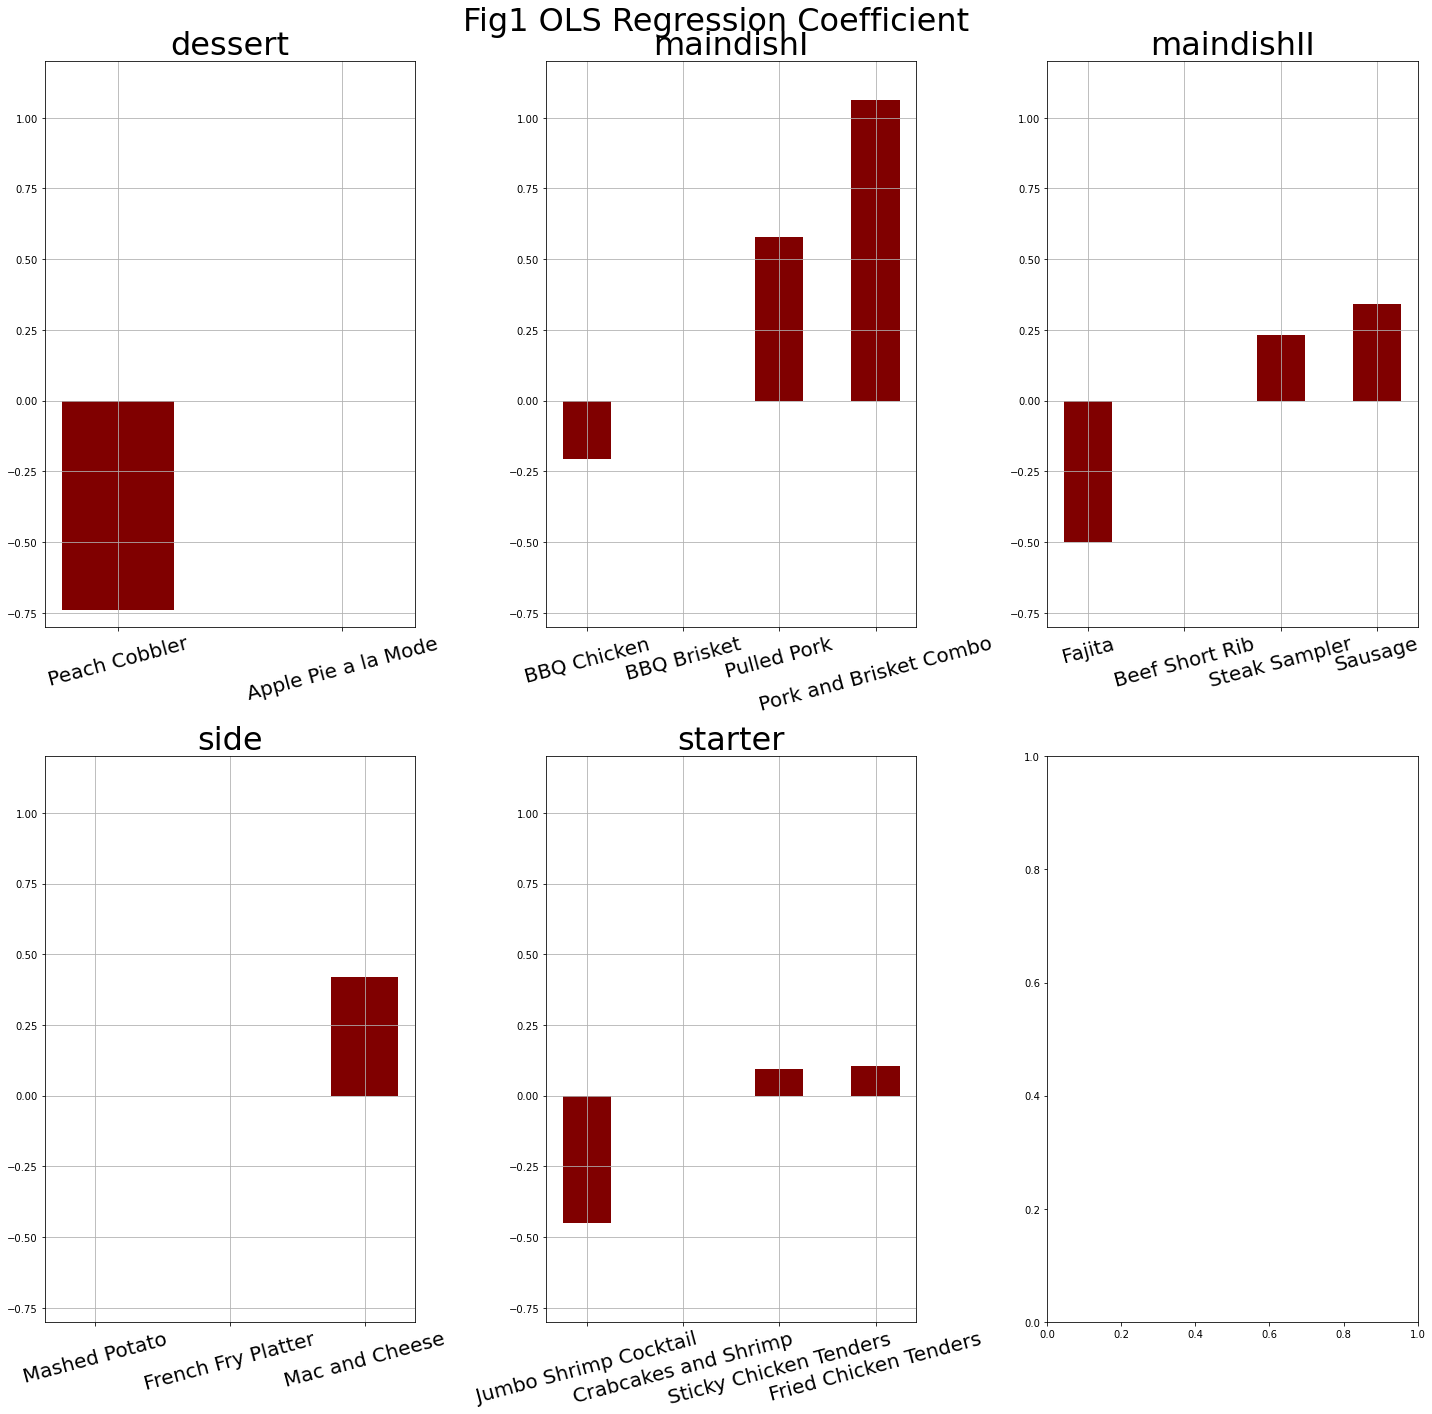

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
c=0
for num,item in coef_plot_df.groupby('food_type'):
    ax[c//3,c%3].bar(item.Item, item.Coefficient, color ='maroon',width = 0.5)
    ax[c//3,c%3].set_ylim(-0.8, 1.2)
    ax[c//3,c%3].grid()
    ax[c//3,c%3].set_title(num,fontsize=32)
    ax[c//3,c%3].set_xticklabels(item.Item,fontsize = 20,rotation=15)
    #ax[c//2,c%2].set_yticklabels(fontsize = 20)
    c+=1
fig.suptitle('Fig1 OLS Regression Coefficient', fontsize=32)   
plt.tight_layout()
plt.show()

#

In [48]:
#plt.figure(figsize=(10,10))
#sns.barplot(x=coef_plot_df.index,y='Coefficient',data=coef_plot_df)
#plt.gca().set_xticklabels(labels=coef_plot_df.index,rotation=90)
#plt.grid()
#plt.title('Fig1 OLS Regression Coefficient')

In [49]:
vendor_df.replace({'Jumbo Shrimp':'Jumbo Shrimp Cocktail',
                   'Pork & Brisket Combo':'Pork and Brisket Combo',
                   'Beef Short Ribs':'Beef Short Rib',
                   'French Fry Basket':'French Fry Platter'},inplace=True)
vendor_df

,Item,Item Category,Cost Per Serving (Dollars)
0,Fried Chicken Tenders,Starters,3.40
1,Crabcakes and Shrimp,Starters,3.50
2,Sticky Chicken Tenders,Starters,2.90
3,Jumbo Shrimp Cocktail,Starters,4.60
4,BBQ Brisket,Main Dish I,5.70
5,Pulled Pork,Main Dish I,6.00
6,BBQ Chicken,Main Dish I,5.30
7,Pork and Brisket Combo,Main Dish I,6.10
8,Sausage,Main Dish II,5.30
9,Fajita,Main Dish II,4.70


In [50]:
price_series = vendor_df.set_index('Item')['Cost Per Serving (Dollars)']
cost_df = pd.DataFrame()
for col in lake_df.columns[:-1]:
    one_price = lake_df[col].map(price_series)
    cost_df = pd.concat([cost_df,one_price],axis=1)
lake_df['total_cost'] = cost_df.sum(axis=1)

Text(0.5, 1.0, 'Fig2 Scatter Plot of avg_rating & vendor total_cost')

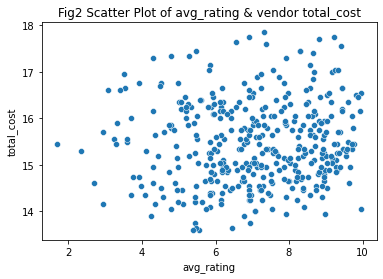

In [51]:
sns.scatterplot(x=lake_df.avg_rating, y=lake_df.total_cost)
plt.title('Fig2 Scatter Plot of avg_rating & vendor total_cost')

In [52]:
lake_df.sort_values(by=['avg_rating'],ascending=False).head(8)

,starter,maindishI,maindishII,side,dessert,avg_rating,pred,total_cost
bundleID,,,,,,,,
90,Fried Chicken Tenders,Pork and Brisket Combo,Beef Short Rib,French Fry Platter,Apple Pie a la Mode,9.97,8.136146,16.55
260,Sticky Chicken Tenders,BBQ Chicken,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.97,7.506562,14.05
41,Fried Chicken Tenders,Pulled Pork,Beef Short Rib,French Fry Platter,Peach Cobbler,9.93,6.910521,16.15
332,Jumbo Shrimp Cocktail,Pulled Pork,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.89,7.746562,16.45
88,Fried Chicken Tenders,Pork and Brisket Combo,Beef Short Rib,Mashed Potato,Apple Pie a la Mode,9.81,8.133646,16.50
6,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Apple Pie a la Mode,9.77,7.415417,15.45
76,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,Mashed Potato,Apple Pie a la Mode,9.75,8.476563,15.80
92,Fried Chicken Tenders,Pork and Brisket Combo,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.70,8.788646,15.35


In [53]:
lake_df.sort_values(by=['pred'],ascending=False).head(8)

,starter,maindishI,maindishII,side,dessert,avg_rating,pred,total_cost
bundleID,,,,,,,,
74,Fried Chicken Tenders,Pork and Brisket Combo,Sausage,Mac and Cheese,Apple Pie a la Mode,8.95,8.898750,15.95
266,Sticky Chicken Tenders,Pork and Brisket Combo,Sausage,Mac and Cheese,Apple Pie a la Mode,9.70,8.888229,15.45
170,Crabcakes and Shrimp,Pork and Brisket Combo,Sausage,Mac and Cheese,Apple Pie a la Mode,9.70,8.794896,16.05
92,Fried Chicken Tenders,Pork and Brisket Combo,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.70,8.788646,15.35
284,Sticky Chicken Tenders,Pork and Brisket Combo,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.28,8.778125,14.85
188,Crabcakes and Shrimp,Pork and Brisket Combo,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,9.30,8.684792,15.45
86,Fried Chicken Tenders,Pork and Brisket Combo,Beef Short Rib,Mac and Cheese,Apple Pie a la Mode,7.23,8.555833,16.65
278,Sticky Chicken Tenders,Pork and Brisket Combo,Beef Short Rib,Mac and Cheese,Apple Pie a la Mode,7.78,8.545312,16.15


## Memo

Fig1 shows the coefficient of the ratings-based conjoint analysis of the bundle options. Among starters, Fried Chicken Tenders and Sticky Chicken Tenders are more popular while the Jumbo Shrimp Cocktail is less popular. Among sides, Mac and Cheese is more popular while French Fry Platter and Mashed Potato is less popular. Among maindishI, Pork and Brisket Combo is the most popular and BBQ Chicken is the least popular. Among maindishII, Sausage and Steak Sampler are more popular while Fajita is less popular. Among desserts, Apple Pie a la Mode is more popular than Peach Cobbler.     

Given the condition that a flat $ \$15$ fee is decided to be charged for all visitors, we also need to pay attention to the cost of the food. Fig2 shows the scatterplot between avg_rating & total cost. Even though there may be some correlation between two variables, the increase of total cost doesn't necessarily help the increase of avg_rating. For one thing, we need to control the total cost under $ \$15$, for another, higher avg_rating is important for dishes. The above two tables shows top 8 avg_rating bundles and top 8 predicted value bundles. There are some difference between two tables. If we control the toal cost below $\$15$, BundleID 260 has the high|est avg_rating in the first table; BundleID 284 has the highest predicted value in the second table. We will further discuss the BundleID 284 in that it is the result generated by the conjoint analysis model.    

For BundleID 284,Apple Pie, Pork and Brisket Combo, Mac and Cheese are the most popular items among options in the dishes. Steak Sampler and Sticky Chicken Tenders are the second most popular items. If we take a close look to the option cost table, we can find that Steak Sampler's cost is lower than Sausage; Sticky Chicken Tenders's cost is lower than Fried Chicken Tenders. We regard it as the necessary compromise for the cost in that the popularity for the whole meal has been high enough for customers' satisfaction.    

Our analysis also comes up with some limitations. First, there are some difference between avg_rating and predicted value. Some of the difference may influence our final decision. For example, BundleID 260 has high avg_rating but relative low predicted value. It is possible that there exists some interactions which change customers' rating for the whole meal. Second, if we have more information about demand and avg_rating relationship we may come up with other options. It is also possible that low avg_rating bundle is acceptable by many customers and the reduction of cost may also generate more profits for the Lobster Land. Third, Lobster Land also hopes that local beer vendors can sell beverages that will go well with the food choices. Therefore, we need extra analysis for the rating with the addition of beer. To delve further into this problem, we are still in need of more valuable information.     

Overall, based on the current information we have, we recommend that Lobster Land should go with BundleID 284 (Starters: Sticky Chicken Tenders, MaindishI: Pork and Brisket Combo, MaindishII: Steak Sampler, Side: Mac and Cheese, Dessert: Apple Pie a la Mode). The BundleID 284 meets all the requirements and keep a perfect balance between rating and cost. 

# ForecastingTotal Revenue:

Text(0.5, 1.0, 'TSQ Seasonal Total Revenue(M)')

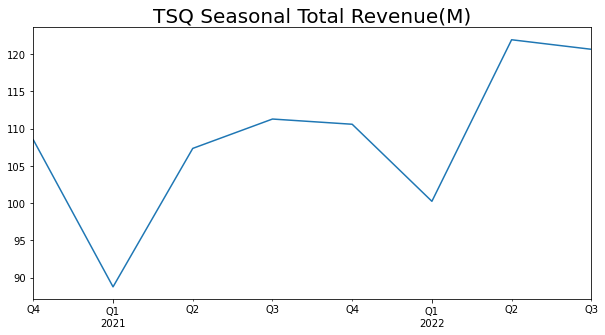

In [54]:
tsq = pd.read_excel('TSQ.xlsx',index_col=0)
tsq.sort_index(inplace=True)
plt.subplots(figsize=(10,5))
tsq['Total Revenue(M)'].plot()
plt.title('TSQ Seasonal Total Revenue(M)',fontsize=20)

## Method 1:

In [55]:
Q4 = tsq["Total Revenue(M)"].ewm(alpha=2/3,adjust=False).mean()
Q4.iloc[-1]

119.01670324645633

In [56]:
Q4_est1 = tsq["Total Revenue(M)"].iloc[-3:].sum()+Q4.iloc[-1]
Q4_est1

461.8167032464563

## Method 2:

In [57]:
tsq = tsq.assign(gross = tsq['Gross Profit(M)']/tsq['Total Revenue(M)'])

In [58]:
Q4_profit = tsq["Gross Profit(M)"].ewm(alpha=2/3,adjust=False).mean().iloc[-1]
Q4_profit

36.12957018747142

In [59]:
Q4_gross_rate = tsq["gross"].ewm(alpha=2/3,adjust=False).mean().iloc[-1]
Q4_gross_rate

0.303074752396461

In [60]:
Q4_method2=Q4_profit/Q4_gross_rate
Q4_method2

119.21009553514135

In [61]:
Q4_est2 = tsq["Total Revenue(M)"].iloc[-3:].sum()+Q4_method2
Q4_est2

462.0100955351414

In [62]:
final_est = (Q4_est1+Q4_est2)/2
final_est

461.9133993907989

## Conclusion for ForecastingTotal Revenue

Both annual(from 2014 to 2021) and quarterly(from 2020-12-31 to 2022-09-30) income statements have limited data. Here we use the quarterly data. The plot shown below indicates that the total revenue has both trend and seasonality. Because of the limited data, the data isn't suitable for ARIMA model and Exponential Smoothing Methods.  

Here we take two estimations and take the means of the two estimations as the final result. The first estimation is to take the exponentially weighted moving average for the total revenue. Alpha is set as 2/3 and the adjust is set as False. The second estimation is to take the exponentially weighted moving average for the gross profit and gross profit rate and then use both of them get the total revenue. Alpha is set as 2/3 and the adjust is set as False. After having the two estimations for Q4 total revenue, we can predict the estimation for the 2022 total revenue by adding Q4 total revenue estimation with previous three quarter total revenue. Since we have two methods for estimation. we can take the means of two estimation as the final estimation.

# Classification

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Data Processing

In [65]:
carnival = pd.read_csv("carnival_visitors.csv")
carnival.head()

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,23,59245,381931,Govt,48,2,8,New York,SUV,2,0
1,27,116628,457159,Tech,51,5,21,New Hampshire,SUV,3,1
2,36,65835,394803,Services,50,4,13,Vermont,Pickup,3,0
3,41,132483,429296,Tech,54,2,11,Massachusetts,SUV,3,1
4,44,83444,488210,Education,51,7,12,Maine,SUV,3,0


In [66]:
carnival.describe()

,householdID,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,primary
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,94350.965000,466169.094800,45.327400,4.458933,14.984133,3.990933,0.541600
std,4330.271354,27826.069636,71050.877531,4.966017,1.796106,8.361085,1.746383,0.498283
min,1.000000,-2537.000000,180540.000000,25.000000,1.000000,1.000000,0.000000,0.000000
25%,3750.750000,75246.750000,418090.500000,42.000000,3.000000,11.000000,3.000000,0.000000
50%,7500.500000,93209.500000,466061.000000,45.000000,4.000000,13.000000,4.000000,1.000000
75%,11250.250000,113346.250000,514245.250000,49.000000,6.000000,16.000000,5.000000,1.000000
max,15000.000000,204057.000000,774358.000000,66.000000,12.000000,62.000000,11.000000,1.000000


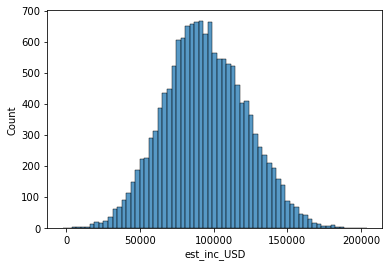

In [67]:
sns.histplot(x = "est_inc_USD", data = carnival);

In [68]:
carnival.corr()

,householdID,est_inc_USD,est_netw_USD,hhold_oldest,hhold_pax,hhold_youngest,stream_subs,primary
householdID,1.000000,0.000139,-0.007308,-0.011543,-0.008880,0.005873,-0.002836,0.001270
est_inc_USD,0.000139,1.000000,0.564164,0.005654,0.007785,-0.031581,-0.009212,-0.086437
est_netw_USD,-0.007308,0.564164,1.000000,0.007206,-0.009177,0.002547,-0.008941,0.004245
hhold_oldest,-0.011543,0.005654,0.007206,1.000000,-0.070359,0.097418,-0.007161,-0.238336
hhold_pax,-0.008880,0.007785,-0.009177,-0.070359,1.000000,-0.448442,-0.006198,0.069625
hhold_youngest,0.005873,-0.031581,0.002547,0.097418,-0.448442,1.000000,-0.002370,-0.054892
stream_subs,-0.002836,-0.009212,-0.008941,-0.007161,-0.006198,-0.002370,1.000000,0.184849
primary,0.001270,-0.086437,0.004245,-0.238336,0.069625,-0.054892,0.184849,1.000000


In [69]:
carnival = carnival.drop("est_netw_USD", axis=1)
carnival.isnull().sum()

householdID         0
est_inc_USD         0
hhold_field         0
hhold_oldest        0
hhold_pax           0
hhold_youngest      0
homeState           0
hhold_car         551
stream_subs         0
primary             0
dtype: int64

In [70]:
carnival = carnival.dropna()

## Logistic Regression Model

In [71]:
carnival_log = carnival.copy()
carnival_log["est_inc_USD"] = carnival_log["est_inc_USD"].apply(lambda x: x/10000)

In [72]:
carnival_log["est_inc_USD"]

0         5.9245
1        11.6628
2         6.5835
3        13.2483
4         8.3444
          ...   
14995     9.6786
14996    11.3057
14997    10.3937
14998    13.7577
14999     5.7796
Name: est_inc_USD, Length: 14449, dtype: float64

#### Iteration 1

In [73]:
carnival_1 = pd.get_dummies(carnival_log, drop_first=True, columns=['hhold_field','homeState','hhold_car'])
carnival_1.columns

Index(['householdID', 'est_inc_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'primary', 'hhold_field_Finance',
       'hhold_field_Govt', 'hhold_field_Manufacturing', 'hhold_field_Other',
       'hhold_field_Services', 'hhold_field_Tech', 'homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_LuxurySedan', 'hhold_car_Pickup', 'hhold_car_SUV',
       'hhold_car_Sedan'],
      dtype='object')

In [74]:
X1 = carnival_1[['est_inc_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'hhold_field_Finance',
       'hhold_field_Govt', 'hhold_field_Manufacturing', 'hhold_field_Other',
       'hhold_field_Services', 'hhold_field_Tech', 'homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan']]
y1 = carnival_1['primary']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state = 2000)

logit_model1 = sm.Logit(y1_train, sm.add_constant(X1_train))
result1 = logit_model1.fit()

Optimization terminated successfully.
         Current function value: 0.611247
         Iterations 5


D:\app\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                primary   No. Observations:                 8669
Model:                          Logit   Df Residuals:                     8643
Method:                           MLE   Df Model:                           25
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.1136
Time:                        17:32:03   Log-Likelihood:                -5298.9
converged:                       True   LL-Null:                       -5977.7
Covariance Type:            nonrobust   LLR p-value:                4.346e-271
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.3323      0.358     14.910      0.000       4.631       6.033
est_inc_USD                  -0.0443      0.010     -4.408      0.000      -0.064      -0.025
hhold_oldest                 -0.1144      0.005    -22.555      0.000      -0.124      -0.104
hhold_pax                     0.0376      0.015      2.552      0.011       0.009       0.066
hhold_youngest               -0.0094      0.003     -2.895      0.004      -0.016      -0.003
stream_subs                   0.2414      0.014     17.229      0.000       0.214       0.269
hhold_field_Finance          -0.9406      0.088    -10.680      0.000      -1.113      -0.768
hhold_field_Govt             -0.9951      0.081    -12.313      0.000      -1.154      -0.837
hhold_field_Manufacturing    -0.5526      0.152     -3.638      0.000      -0.850      -0.255
hhold_field_Other            -0.3742      0.159     -2.361      0.018      -0.685      -0.064
hhold_field_Services          0.1518      0.091      1.664      0.096      -0.027       0.331
hhold_field_Tech             -0.5232      0.091     -5.721      0.000      -0.703      -0.344
homeState_Connecticut        -0.0274      0.257     -0.106      0.915      -0.531       0.477
homeState_Maine              -0.1155      0.214     -0.540      0.589      -0.535       0.304
homeState_Massachusetts      -0.2546      0.236     -1.077      0.281      -0.718       0.209
homeState_New Hampshire      -0.2328      0.221     -1.052      0.293      -0.666       0.201
homeState_New York           -0.0719      0.230     -0.312      0.755      -0.523       0.380
homeState_Ontario            -0.2212      0.232     -0.953      0.341      -0.676       0.234
homeState_Quebec             -0.0696      0.232     -0.300      0.764      -0.525       0.385
homeState_Rhode Island       -0.2778      0.240     -1.155      0.248      -0.749       0.193
homeState_US_Other           -0.2100      0.242     -0.868      0.385      -0.684       0.264
homeState_Vermont            -0.1254      0.224     -0.559      0.576      -0.565       0.314
hhold_car_LuxurySedan         0.3422      0.093      3.678      0.000       0.160       0.525
hhold_car_Pickup              0.0981      0.107      0.917      0.359      -0.112       0.308
hhold_car_SUV                 0.0937      0.088      1.071      0.284      -0.078       0.265
hhold_car_Sedan               0.3089      0.095      3.243      0.001       0.122       0.496
=============================================================================================
"""

#### Iteration 2

From iteration 1, we can see high p-value(>0.5) for all levels of `homeState` variables. Therefore, I drop the categorical variable in iteration 2.

In [76]:
X2_train = X1_train.drop(labels=['homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont'], axis = 1)
X2_test = X1_test.drop(labels=['homeState_Connecticut',
       'homeState_Maine', 'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont'], axis = 1)
y2_train = y1_train.copy()
y2_test = y1_test.copy()

In [77]:
logit_model2 = sm.Logit(y2_train, sm.add_constant(X2_train))
result2 = logit_model2.fit()

Optimization terminated successfully.
         Current function value: 0.611718
         Iterations 5


D:\app\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                primary   No. Observations:                 8669
Model:                          Logit   Df Residuals:                     8653
Method:                           MLE   Df Model:                           15
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.1129
Time:                        17:32:03   Log-Likelihood:                -5303.0
converged:                       True   LL-Null:                       -5977.7
Covariance Type:            nonrobust   LLR p-value:                1.249e-278
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         5.1690      0.287     17.999      0.000       4.606       5.732
est_inc_USD                  -0.0444      0.010     -4.425      0.000      -0.064      -0.025
hhold_oldest                 -0.1141      0.005    -22.524      0.000      -0.124      -0.104
hhold_pax                     0.0385      0.015      2.620      0.009       0.010       0.067
hhold_youngest               -0.0093      0.003     -2.882      0.004      -0.016      -0.003
stream_subs                   0.2418      0.014     17.281      0.000       0.214       0.269
hhold_field_Finance          -0.9400      0.088    -10.686      0.000      -1.112      -0.768
hhold_field_Govt             -0.9941      0.081    -12.312      0.000      -1.152      -0.836
hhold_field_Manufacturing    -0.5524      0.151     -3.646      0.000      -0.849      -0.255
hhold_field_Other            -0.3766      0.158     -2.378      0.017      -0.687      -0.066
hhold_field_Services          0.1525      0.091      1.674      0.094      -0.026       0.331
hhold_field_Tech             -0.5231      0.091     -5.729      0.000      -0.702      -0.344
hhold_car_LuxurySedan         0.3388      0.093      3.647      0.000       0.157       0.521
hhold_car_Pickup              0.0955      0.107      0.894      0.371      -0.114       0.305
hhold_car_SUV                 0.0896      0.087      1.025      0.305      -0.082       0.261
hhold_car_Sedan               0.3071      0.095      3.227      0.001       0.121       0.494
=============================================================================================
"""

In [79]:
logmodel = LogisticRegression(random_state = 2000, max_iter=1000)


In [80]:
logmodel.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000, random_state=2000)

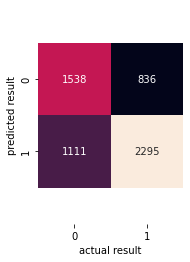

In [81]:
# against the test set
predictions_logit = logmodel.predict(X2_test)
mat_logit = confusion_matrix(predictions_logit, y2_test)
sns.heatmap(mat_logit,square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=0.5
b-=0.5
plt.ylim(a,b)
plt.show()

In [82]:
predictions2 = logmodel.predict(X2_train)
accuracy_score(y2_train, predictions2)

0.674933671703772

In [83]:
accuracy_logmodel = (mat_logit[1,1]+mat_logit[0,0])/sum(sum(mat_logit))
print('The logistic regression model has a accuracy of: ', accuracy_logmodel)

The logistic regression model has a accuracy of:  0.6631487889273356


In [84]:
sensitivity_logmodel = mat_logit[1,1]/(mat_logit[1,1]+mat_logit[0,1])
print('The logistic regression model has a sensitivity of: ', sensitivity_logmodel)

The logistic regression model has a sensitivity of:  0.7329926541041201


In [85]:
specificity_logmodel = mat_logit[0,0]/(mat_logit[0,0]+mat_logit[1,0])
print('The logistic regression model has a specificity of: ', specificity_logmodel)

The logistic regression model has a specificity of:  0.5805964514911287


In [86]:
precision_logmodel = mat_logit[1,1]/(mat_logit[1,1]+mat_logit[1,0])
print('The logistic regression model has a precision of: ', precision_logmodel)

The logistic regression model has a precision of:  0.673810921902525


## Random Forest Model

In [87]:
carnival_3 = pd.get_dummies(carnival, drop_first=False, columns=['hhold_field','homeState','hhold_car'])
carnival_3.columns

Index(['householdID', 'est_inc_USD', 'hhold_oldest', 'hhold_pax',
       'hhold_youngest', 'stream_subs', 'primary', 'hhold_field_Education',
       'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
       'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
       'homeState_Can_Other', 'homeState_Connecticut', 'homeState_Maine',
       'homeState_Massachusetts', 'homeState_New Hampshire',
       'homeState_New York', 'homeState_Ontario', 'homeState_Quebec',
       'homeState_Rhode Island', 'homeState_US_Other', 'homeState_Vermont',
       'hhold_car_Compact/Hybrid', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan'],
      dtype='object')

In [88]:
X3 = carnival_3[['est_inc_USD', 'hhold_oldest',
       'hhold_pax', 'hhold_youngest', 'stream_subs',
       'hhold_field_Education', 'hhold_field_Finance', 'hhold_field_Govt',
       'hhold_field_Manufacturing', 'hhold_field_Other',
       'hhold_field_Services', 'hhold_field_Tech', 'homeState_Can_Other',
       'homeState_Connecticut', 'homeState_Maine', 'homeState_Massachusetts',
       'homeState_New Hampshire', 'homeState_New York', 'homeState_Ontario',
       'homeState_Quebec', 'homeState_Rhode Island', 'homeState_US_Other',
       'homeState_Vermont', 'hhold_car_Compact/Hybrid',
       'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan']]
y3 = carnival_3['primary']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state = 2000)

In [89]:
clf=RandomForestClassifier()
param_grid1 = {
    'n_estimators' : [150],
    'max_depth' : [9,10, 11],
    'max_features' : [10,11,12],
    'min_samples_split' : [4, 5, 6]
}
travel_rfc = GridSearchCV(estimator = clf, param_grid = param_grid1, cv = 5)
travel_rfc.fit(X1_train, y1_train)
print(travel_rfc.best_params_)

{'max_depth': 10, 'max_features': 11, 'min_samples_split': 6, 'n_estimators': 150}


In [90]:
clf=RandomForestClassifier(max_depth=10, max_features=11, min_samples_split= 5, n_estimators= 150, random_state=2000)
clf.fit(X3_train,y3_train)

RandomForestClassifier(max_depth=10, max_features=11, min_samples_split=5,
                       n_estimators=150, random_state=2000)

In [91]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X3_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
1,0.262284,hhold_oldest
4,0.184424,stream_subs
0,0.142079,est_inc_USD
3,0.092947,hhold_youngest
2,0.055545,hhold_pax
10,0.041402,hhold_field_Services
5,0.030394,hhold_field_Education
7,0.028976,hhold_field_Govt
6,0.023026,hhold_field_Finance
27,0.011566,hhold_car_Sedan


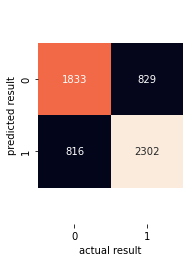

In [92]:
predictions_rfm = clf.predict(X3_test)
mat_rfm = confusion_matrix(predictions_rfm, y3_test)
sns.heatmap(mat_rfm,square = True, fmt = 'g', annot = True, cbar = False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=0.5
b-=0.5
plt.ylim(a,b)
plt.show()

In [93]:
predictions1 = clf.predict(X3_train)
accuracy_score(y3_train, predictions1)

0.7983619794670666

In [94]:
accuracy_rfm = (mat_rfm[1,1]+mat_rfm[0,0])/sum(sum(mat_rfm))
print('The random forest model has a accuracy of: ', accuracy_rfm)

The random forest model has a accuracy of:  0.7153979238754326


In [95]:
sensitivity_rfm = mat_rfm[1,1]/(mat_rfm[1,1]+mat_rfm[0,1])
print('The random forest model has a sensitivity of: ', sensitivity_rfm)

The random forest model has a sensitivity of:  0.735228361545832


In [96]:
specificity_rfm = mat_rfm[0,0]/(mat_rfm[0,0]+mat_rfm[1,0])
print('The random forest model has a specificity of: ', specificity_rfm)

The random forest model has a specificity of:  0.6919592298980748


In [97]:
precision_rfm = mat_rfm[1,1]/(mat_rfm[1,1]+mat_rfm[1,0])
print('The random forest model has a precision of: ', precision_rfm)

The random forest model has a precision of:  0.7382937780628608


## Conclusion for Classification

We used the carnival_visitors dataset to build a model to classify whether a particular household prefers "consume" or "entertain". Firstly, to get data prepared, we drop the NaNs value in hhold_car as there are only 551 (about 3.7%) rows containing NaNs. Meanwhile, we accessed the correlations of the data, where `est_inc_USD` and `est_netw_USD` has a strong correlation(>0.5). So we drop `est_netw_USD`, considering the total income could have a stronger impact on the decision than the net worth. Secondly, we fitted a logistic regression model and access its performance. In this part, we divided `est_inc_USD` by 10000 as the range of it is too large. We didn't use the log transformation since it is quite symmetric. Finally, we fitted a logistic regression model and access its performance as well to compare with the logistic regression model.

For the logistic regression model, the accuracy of the training set is 67.5% and of the testing set is 66.3% -- quite close, which means there are no overfitting situations. The sensitivity is 73.3% but the specificity is 58.1%, which means this model is better at identifying those who prefer entertainment, but worse at identifying those who prefer consumption. For the random forest model, the accuracy of the training set is 79.8% and for the testing set is 71.5%. This model exist a slight overfit but performs better than the logistic regression model. The sensitivity is 73.5% and the specificity is 69.2%, both are higher than the logistic one. Therefore, we think the random forest model could be better used by Lobster Land management to make the classification.

Furthermore, when we built the logistic regression model, we dropped the `homeStates` since it is statistically insignificant at all levels -- It is not important at all. It can be also seen by the feature important table of the random forest model. Actually, the random forest model thinks the most three important factors when a household chooses their preference are the age of the oldest people, the number of streaming entertainment service subscriptions, and the total income. Even though the random forest model is non-linear, we can see the overall trends through the logistic regression model -- the older age and higher income will make households more likely to choose consumption, and more streaming entertainment service subscriptions will make the household more likely to choose entertainment. Therefore advertisements for eating, drinking, and shopping, should aim at older people and high-income households. And advertisements for live shows, performance acts, concerts, comedy, and live competitions should aim at younger people, low-income households, and streaming lovers.

# A/B Testing

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
dt = pd.read_csv("snowmobile_pics.csv")
# dt.head()

## Data Visualization

In [99]:
# check the balance distribution of 3 pictures
dt.groupby('pic_seen').describe().round(2).spend

,count,mean,std,min,25%,50%,75%,max
pic_seen,,,,,,,,
Racers in Action,1110.0,16.78,0.86,14.30,16.20,16.80,17.40,19.20
Sharp Turn,1142.0,18.61,2.43,10.42,17.02,18.62,20.22,27.12
Starting Line,1148.0,14.02,2.11,7.40,12.60,14.00,15.50,20.90


The "count" column shows that the dataset is balanced, which helps avoid confounding risks, and we assume the test was conducted by randomly assigning users to each picture grounp.

C:\Users\ranfe\AppData\Local\Temp/ipykernel_1128/1866388807.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(plot_index,rotation=30)


[Text(0, 0, "('Racers in Action', 0)"),
 Text(1, 0, "('Racers in Action', 1)"),
 Text(2, 0, "('Sharp Turn', 0)"),
 Text(3, 0, "('Sharp Turn', 1)"),
 Text(4, 0, "('Starting Line', 0)"),
 Text(5, 0, "('Starting Line', 1)")]

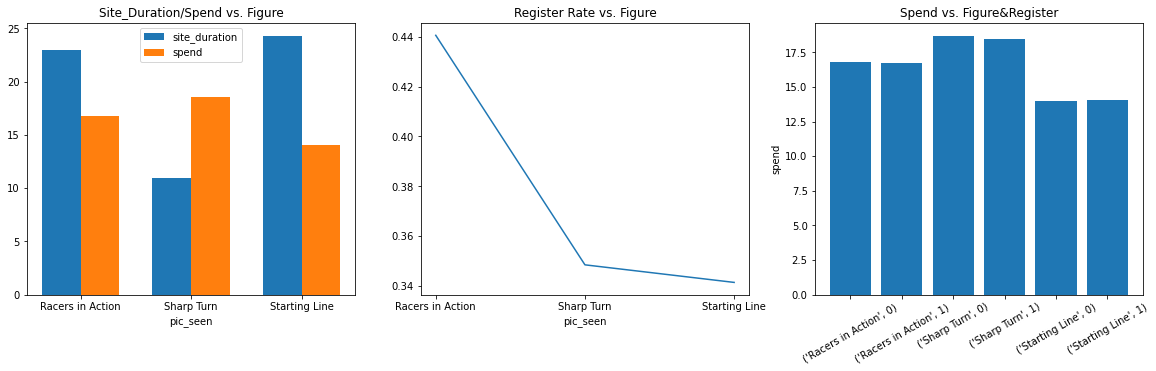

In [100]:
temp1 = dt.groupby('pic_seen')[['site_duration','spend']].mean()
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,5))
labels = temp1.index
width = 0.35
x = np.arange(len(labels))
rects1 = ax[0].bar(x - width/2, temp1.site_duration.values,width,label='site_duration')
rects2 = ax[0].bar(x + width/2, temp1.spend.values,width,label='spend')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_title("Site_Duration/Spend vs. Figure")
ax[0].set_xlabel(temp1.index.name)
ax[0].legend()

ax[1].plot(dt.groupby('pic_seen')['register'].mean())
ax[1].set_title("Register Rate vs. Figure")
ax[1].set_xlabel(temp1.index.name)

temp2 = dt.groupby(['pic_seen','register'])['spend'].mean()
plot_index = [str(i) for i in temp2.index]
ax[2].bar(plot_index,temp2.values)
ax[2].set_ylabel("spend")
ax[2].set_title("Spend vs. Figure&Register")
ax[2].set_xticklabels(plot_index,rotation=30)

From the "Site_Duration/Spend vs. Figure" plot, we can see the "Sharpt Turn" figure has the largest conversion rate in consumer purchasing behavior.

From the "Register Rate vs. Figure" plot, we can see the "Racers in Action" figure leads to more registration for the snowmobile race.

From the "Spend vs. Figure&Register" plot, we can see registration seems does not have relationship with purchasing behaviors.

## A/B Test for "Spend"

In [101]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Racers in Action', 'spend'].values,
                       dt.loc[dt['pic_seen'] == 'Sharp Turn', 'spend'].values, 
                       equal_var=False)
print("For Figure(Racers in Action) vs. Figure(Sharp Turn): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Racers in Action) vs. Figure(Sharp Turn): t-statistics= -23.86 , p-value= 0.0 .


In [102]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Racers in Action', 'spend'].values,
                       dt.loc[dt['pic_seen'] == 'Starting Line', 'spend'].values, 
                       equal_var=False)
print("For Figure(Racers in Action) vs. Figure(Starting Line): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Racers in Action) vs. Figure(Starting Line): t-statistics= 41.03 , p-value= 0.0 .


In [103]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Starting Line', 'spend'].values,
                       dt.loc[dt['pic_seen'] == 'Sharp Turn', 'spend'].values, 
                       equal_var=False)
print("For Figure(Starting Line) vs. Figure(Sharp Turn): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Starting Line) vs. Figure(Sharp Turn): t-statistics= -48.18 , p-value= 0.0 .


We first selected "Spend" as our desired goal to compare the effectiveness of three different figures on purchasing behavior. Since our goal is to drive revenue through our snowmobile race, we chose "Spend" as our measure of success. The results of our t-tests showed that, for all three groups, the p-value of the t-test was smaller than 0.05 (assuming an alpha value of 0.05 for statistical tests). This indicates that the variation in purchasing behavior among members who received different figures is not due to random chance. In other words, the figures do have a statistically significant effect on purchasing behavior.

## A/B Test for "Register"

In [104]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Racers in Action', 'register'].values,
                       dt.loc[dt['pic_seen'] == 'Sharp Turn', 'register'].values, 
                       equal_var=False)
print("For Figure(Racers in Action) vs. Figure(Sharp Turn): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Racers in Action) vs. Figure(Sharp Turn): t-statistics= 4.48 , p-value= 0.0 .


In [105]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Racers in Action', 'register'].values,
                       dt.loc[dt['pic_seen'] == 'Starting Line', 'register'].values, 
                       equal_var=False)
print("For Figure(Racers in Action) vs. Figure(Starting Line): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Racers in Action) vs. Figure(Starting Line): t-statistics= 4.84 , p-value= 0.0 .


In [106]:
t, p = stats.ttest_ind(dt.loc[dt['pic_seen'] == 'Starting Line', 'register'].values,
                       dt.loc[dt['pic_seen'] == 'Sharp Turn', 'register'].values, 
                       equal_var=False)
print("For Figure(Starting Line) vs. Figure(Sharp Turn): t-statistics=", t.round(2), ", p-value=",p.round(2),"." )

For Figure(Starting Line) vs. Figure(Sharp Turn): t-statistics= -0.35 , p-value= 0.72 .


Considering more registeration can creat a bustling atmosphere at the festival which can attract more people to participate with the aim of lift revenue. We also conducted an A/B test to compare the effectiveness of different figures on "Register" and found that Figure (Starting Line) significantly promoted registration compared to the other two figures. There was no meaningful difference in registration between groups that received Figure (Starting Line) versus Figure (Sharp Turn), as indicated by the p-value of our t-test being larger than 0.05. Our results suggest that Figure (Starting Line) is the most effective figure for promoting registration.


## Conclusion for A/B Test

The management at Lobster Land must weigh the trade-offs between focusing on maximizing spending or increasing registration for holding the snowmobile race, similar to balance profit oriented or revenue oriented when pricing. Our data suggests that Figure (Sharp Turn) is more effective at promoting spending, while Figure (Racers in Action) is more effective at promoting registration. Based on this information, the management can make an informed decision on which figure to use in order to achieve their desired goal.

# Total Conclusion

#### Summary Stats
    
Based on angle_market data, the lobster land did hold a well organized market for their business. If the lobster land has estimate hourly sales, it would be better for them to select more appropriate vendors for the carnival. Last but not least, Lobster Land might consider narrow down the size of loval vendors. With competition comes advancement.


#### Segmentation and Targeting
    
Our team has applied K-Means clustering to create 5 clusters of Maine families based on their spending habits and characteristics, each with a featured name, and targeted with a tailored strategy for park management,such as sending more marketing emails and Ads with deals and coupons, holding games and events for large families, etc. These approachs can help to effectively market the park and increase revenue.

#### Conjoint Analysis

We recommend that Lobster Land should go with BundleID 284 (Starters: Sticky Chicken Tenders, MaindishI: Pork and Brisket Combo, MaindishII: Steak Sampler, Side: Mac and Cheese, Dessert: Apple Pie a la Mode). The BundleID 284 meets all the requirements and keep a perfect balance between rating and cost.


#### Forecasting

We apply exponentially weighted moving average to estimate the total revenue in 2022 for TSQ. Two approaches are used in the estimation. The first approach is to use season total revenue to get the estimation. The second is to use season gross profit and gross profit rate to get the estimation. We take the mean of two estimations as the final output and our final estimation for TSQ’s total revenue in 2022 is about 461.91M.estimation.

#### Classification

We built a random forest model to classify whether a particular household prefers "consumption" or "entertainment". The model acurracy is 71.5% and implies that older age and higher income will make households more likely to choose consumption, and more streaming entertainment service subscriptions will make the household more likely to choose entertainment.

####  A/B Testing

Our A/B Testing result suggest that Figure (Sharp Turn) is more effective at promoting spending, while Figure (Racers in Action) is more effective at promoting registration. The management at Lobster Land must weigh the trade-offs between focusing on maximizing spending or increasing registration for holding the snowmobile race.  

####  Case Analysis

The success of Qingdao International Beer Festival can be attributed to its cultural uniqueness and organization structure.
Therefore, we suggest that Lobster Land works on both the cultural and organizational aspects, incorporating unique local cultural elements such as lobster into the carnival, and working with the local government to ensure financial support so that it can meet the goal to hold a regular and annual carnival.